In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
rent_df = pd.read_excel("Metro_zori_uc_sfr_sm_month.xlsx", sheet_name="Filtered_clean")
print(rent_df.head())

principal_value_df = pd.read_excel("Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.xlsx", sheet_name="Filtered_cleaned")
principal_value_df.head()

   MonthYear  Minneapolis, MN   Duluth, MN  Rochester, MN          USA
0 2018-01-31      1651.229431  1285.898298    1324.459656  1456.475558
1 2018-02-28      1666.570082  1282.255189    1373.733893  1464.487214
2 2018-03-31      1675.741524  1273.994196    1394.786511  1475.718777
3 2018-04-30      1688.432775  1272.153748    1420.143102  1486.921656
4 2018-05-31      1695.923052  1288.003275    1416.106843  1496.455010


,MonthYear,"Minneapolis, MN","Duluth, MN","Rochester, MN",USA
0,2018-01-31,272790.391700,153019.204829,218363.967261,221632.860267
1,2018-02-28,274889.696695,153307.688686,219632.614341,222835.587782
2,2018-03-31,277166.902005,153919.747485,220774.265507,224222.991098
3,2018-04-30,279441.449079,154623.054771,221707.680088,225480.804030
4,2018-05-31,281434.591075,155506.518195,222588.557622,226703.051359


In [5]:
# Rent

rent_df.head().round()
print(rent_df.columns)

Index(['MonthYear', 'Minneapolis, MN', 'Duluth, MN', 'Rochester, MN', 'USA'], dtype='object')


In [6]:
# principal value

principal_value_df.head().round()

,MonthYear,"Minneapolis, MN","Duluth, MN","Rochester, MN",USA
0,2018-01-31,272790.0,153019.0,218364.0,221633.0
1,2018-02-28,274890.0,153308.0,219633.0,222836.0
2,2018-03-31,277167.0,153920.0,220774.0,224223.0
3,2018-04-30,279441.0,154623.0,221708.0,225481.0
4,2018-05-31,281435.0,155507.0,222589.0,226703.0


In [7]:
# Assuming that the data extracrted is the home value and 30 yr mortgage, principal value
monthly_principal_payment_minneapolis = principal_value_df["Minneapolis, MN"]/30/12
monthly_principal_payment_minneapolis.head().round()

0    758.0
1    764.0
2    770.0
3    776.0
4    782.0
Name: Minneapolis, MN, dtype: float64

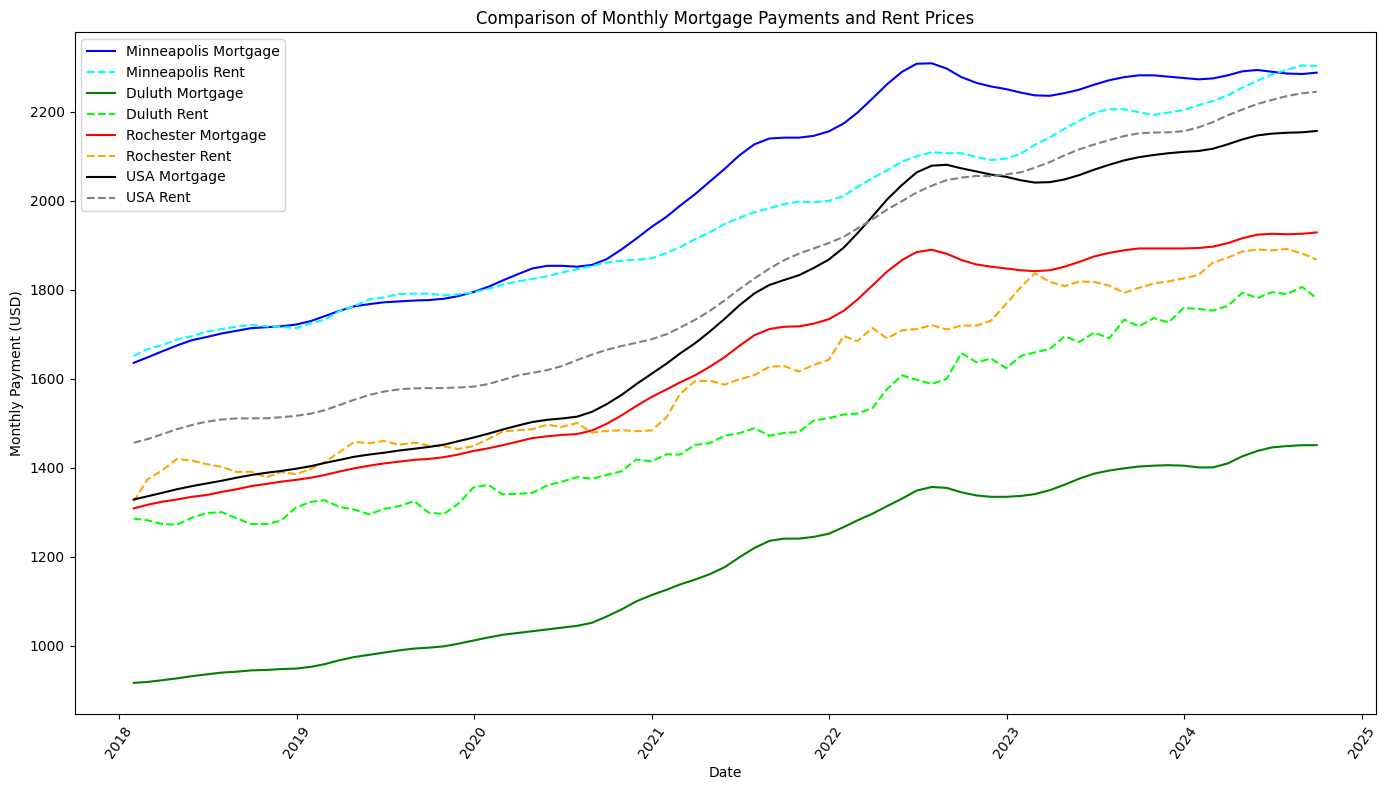

In [8]:
# Calculate monthly mortgage payment and interest for each city and add to DataFrame based on term and rate. 
loan_term_years = 30
annual_interest_rate = 6.0
monthly_interest_rate = annual_interest_rate / 100 / 12
number_of_payments = loan_term_years * 12

def calculate_monthly_payment(principal): # Function to calculate interest given term and rate
    return principal * (monthly_interest_rate * (1 + monthly_interest_rate)**number_of_payments) / ((1 + monthly_interest_rate)**number_of_payments - 1)

principal_value_df["Minneapolis_Mortgage"] = principal_value_df["Minneapolis, MN"].apply(calculate_monthly_payment).round() # The .apply() method is 
# used to apply the calculate_monthly_payment function to each value in the "Duluth, MN" column as the principal argument. The function will compute 
# the monthly mortgage payment based on the principal value (home price) for each row.
principal_value_df["Duluth_Mortgage"] = principal_value_df["Duluth, MN"].apply(calculate_monthly_payment).round() 
principal_value_df["Rochester_Mortgage"] = principal_value_df["Rochester, MN"].apply(calculate_monthly_payment).round()
principal_value_df["USA_Mortgage"] = principal_value_df["USA"].apply(calculate_monthly_payment).round()


# Merge DataFrames on 'MonthYear'
merged_df = pd.merge(principal_value_df, rent_df, on="MonthYear", suffixes=("_mortgage", "_rent")) # Needed to avoid conflicts between 
merged_df = merged_df = merged_df.bfill()  # Backward fill
# the 2 dateframes having the same column names. 

# Plotting the merged data with updated suffixes
plt.figure(figsize=(14, 8))

plt.plot(merged_df["MonthYear"], merged_df["Minneapolis_Mortgage"], label="Minneapolis Mortgage", color="blue")
plt.plot(merged_df["MonthYear"], merged_df["Minneapolis, MN_rent"], label="Minneapolis Rent", color="cyan", linestyle="--")

plt.plot(merged_df["MonthYear"], merged_df["Duluth_Mortgage"], label="Duluth Mortgage", color="green")
plt.plot(merged_df["MonthYear"], merged_df["Duluth, MN_rent"], label="Duluth Rent", color="lime", linestyle="--")

plt.plot(merged_df["MonthYear"], merged_df["Rochester_Mortgage"], label="Rochester Mortgage", color="red")
plt.plot(merged_df["MonthYear"], merged_df["Rochester, MN_rent"], label="Rochester Rent", color="orange", linestyle="--")

plt.plot(merged_df["MonthYear"], merged_df["USA_Mortgage"], label="USA Mortgage", color="black")
plt.plot(merged_df["MonthYear"], merged_df["USA_rent"], label="USA Rent", color="gray", linestyle="--")

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Monthly Payment (USD)")
plt.title("Comparison of Monthly Mortgage Payments and Rent Prices")
plt.legend(loc="upper left")
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

In [9]:
# The Duluth rent has missing values. 
# Possibly we can find a way to fill them in using trends of Mpls and Rochester? Or find the average from 2022 - 2023? 
# Used merged_df = merged_df = merged_df.bfill() since the trend line was downward at that point. 

In [10]:
data = [
    merged_df["Minneapolis_Mortgage"],
    merged_df["Minneapolis, MN_rent"],
    merged_df["Duluth_Mortgage"],
    merged_df["Duluth, MN_rent"],
    merged_df["Rochester_Mortgage"],
    merged_df["Rochester, MN_rent"],
    merged_df["USA_Mortgage"],
    merged_df["USA_rent"]
]

In [11]:
labels = [
    "Minneapolis Mortgage",
    "Minneapolis Rent",
    "Duluth Mortgage",
    "Duluth Rent",
    "Rochester Mortgage",
    "Rochester Rent",
    "USA Mortgage",
    "USA Rent"
]

C:\Users\mnmat\AppData\Local\Temp\ipykernel_53612\2110668316.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


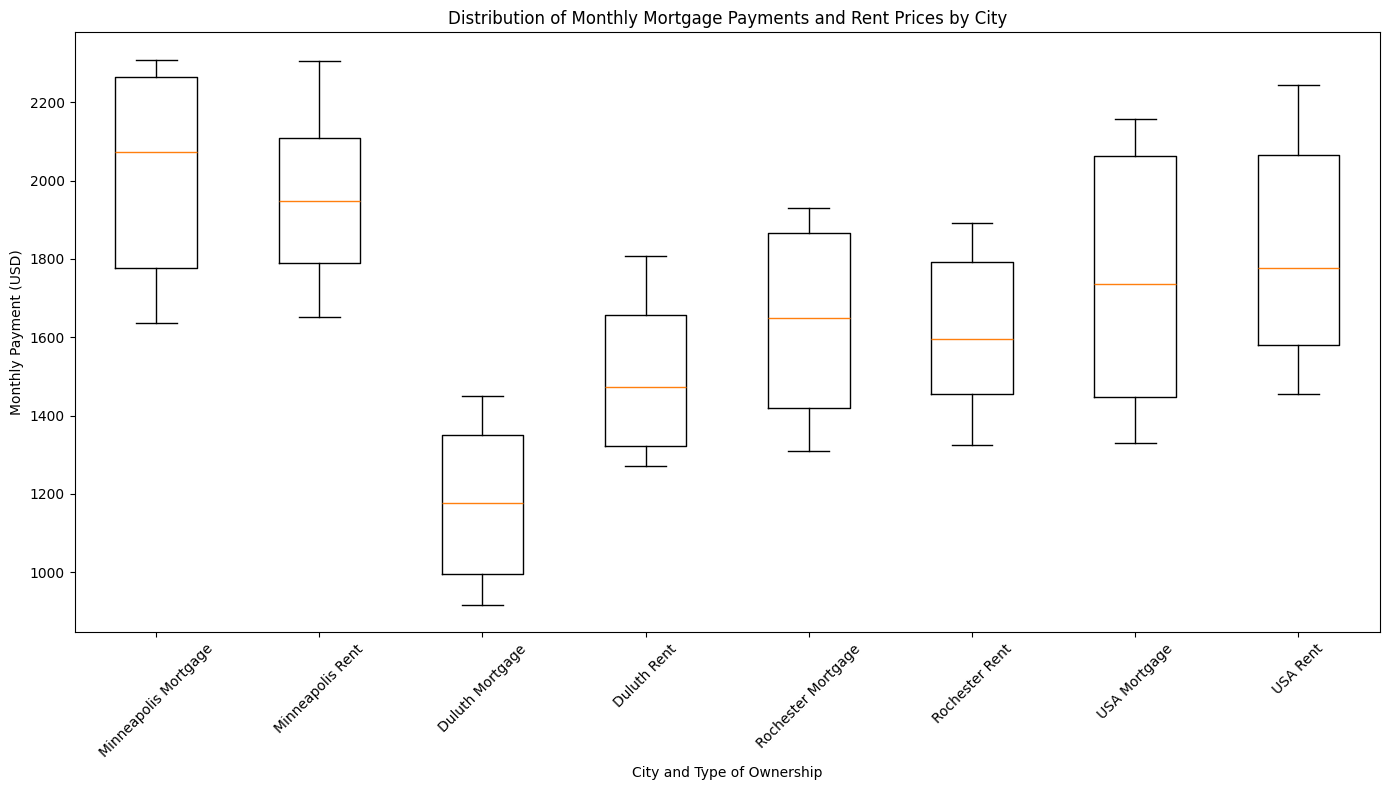

In [12]:
plt.figure(figsize=(14, 8))
plt.boxplot(data, labels=labels)
plt.xlabel("City and Type of Ownership")
plt.ylabel("Monthly Payment (USD)")
plt.title("Distribution of Monthly Mortgage Payments and Rent Prices by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Change from 2018 to 2019: $80.00 (4.67%)
Change from 2019 to 2020: $77.00 (4.29%)
Change from 2020 to 2021: $129.00 (6.89%)
Change from 2021 to 2022: $95.00 (4.75%)
Change from 2022 to 2023: $109.00 (5.20%)


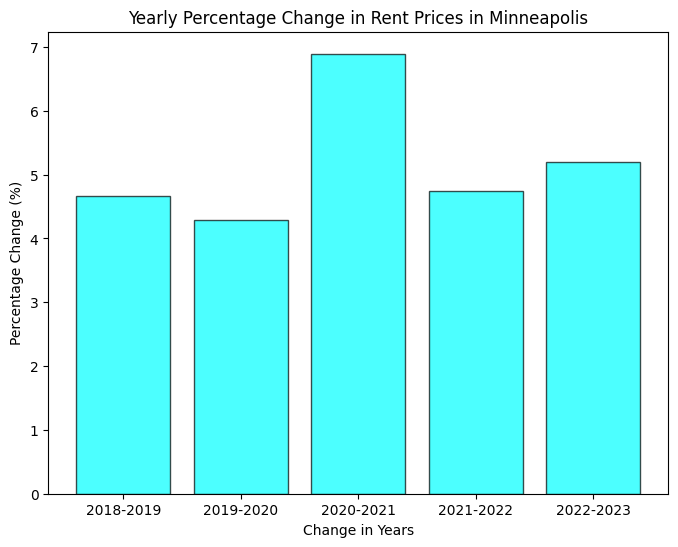

In [50]:
#Minneapolis Rent Price
percent_change = []
end_values = [1714, 1794, 1871, 2000, 2095, 2204]
years = len(end_values)
previous_end_value = end_values[0]
for year in range(1, years):
    current_end_value = end_values[year]
    yearly_change = current_end_value - previous_end_value
    percentage_change = (yearly_change / previous_end_value) * 100
    print(f"Change from {year + 2017} to {year + 2018}: ${yearly_change:.2f} ({percentage_change:.2f}%)")
    previous_end_value = current_end_value
    percent_change.append(percentage_change)
    
percent_change_2018_to_2019 = ((end_values[1] - end_values[0]) / end_values[0]) * 100
percent_change_2019_to_2020 = ((end_values[2] - end_values[1]) / end_values[1]) * 100
percent_change_2020_to_2021 = ((end_values[3] - end_values[2]) / end_values[2]) * 100
percent_change_2021_to_2022 = ((end_values[4] - end_values[3]) / end_values[3]) * 100
percent_change_2022_to_2023 = ((end_values[5] - end_values[4]) / end_values[4]) * 100

change_in_years = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']

plt.figure(figsize=(8, 6))
plt.bar(change_in_years, percent_change, color='cyan', edgecolor='black', alpha=0.7)
plt.title('Yearly Percentage Change in Rent Prices in Minneapolis')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Change in Years')
plt.show()

Change from 2018 to 2019: $45.00 (3.43%)
Change from 2019 to 2020: $59.00 (4.35%)
Change from 2020 to 2021: $97.00 (6.86%)
Change from 2021 to 2022: $112.00 (7.41%)
Change from 2022 to 2023: $135.00 (8.31%)


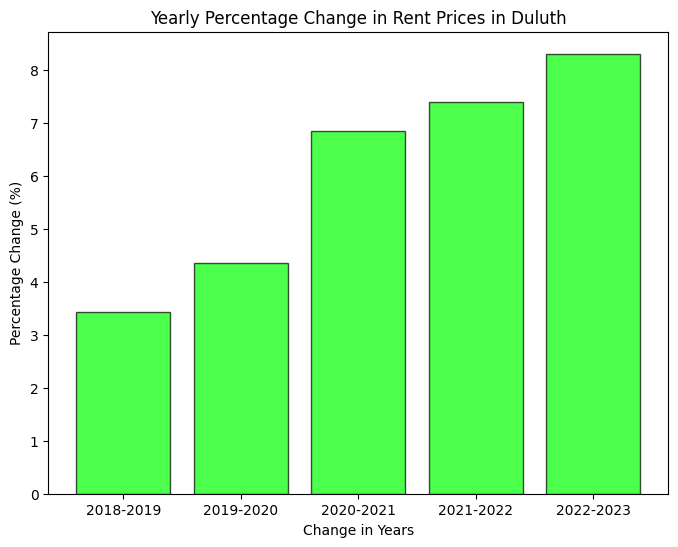

In [48]:
#Duluth Rent Price
percent_change = []
end_values = [1311, 1356, 1415, 1512, 1624, 1759]
years = len(end_values)
previous_end_value = end_values[0]
for year in range(1, years):
    current_end_value = end_values[year]
    yearly_change = current_end_value - previous_end_value
    percentage_change = (yearly_change / previous_end_value) * 100
    print(f"Change from {year + 2017} to {year + 2018}: ${yearly_change:.2f} ({percentage_change:.2f}%)")
    previous_end_value = current_end_value
    percent_change.append(percentage_change)

percent_change_2018_to_2019 = ((end_values[1] - end_values[0]) / end_values[0]) * 100
percent_change_2019_to_2020 = ((end_values[2] - end_values[1]) / end_values[1]) * 100
percent_change_2020_to_2021 = ((end_values[3] - end_values[2]) / end_values[2]) * 100
percent_change_2021_to_2022 = ((end_values[4] - end_values[3]) / end_values[3]) * 100
percent_change_2022_to_2023 = ((end_values[5] - end_values[4]) / end_values[4]) * 100

change_in_years = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']

plt.figure(figsize=(8, 6))
plt.bar(change_in_years, percent_change, color='lime', edgecolor='black', alpha=0.7)
plt.title('Yearly Percentage Change in Rent Prices in Duluth')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Change in Years')
plt.show()

Change from 2018 to 2019: $63.00 (4.55%)
Change from 2019 to 2020: $35.00 (2.42%)
Change from 2020 to 2021: $159.00 (10.71%)
Change from 2021 to 2022: $125.00 (7.61%)
Change from 2022 to 2023: $57.00 (3.22%)


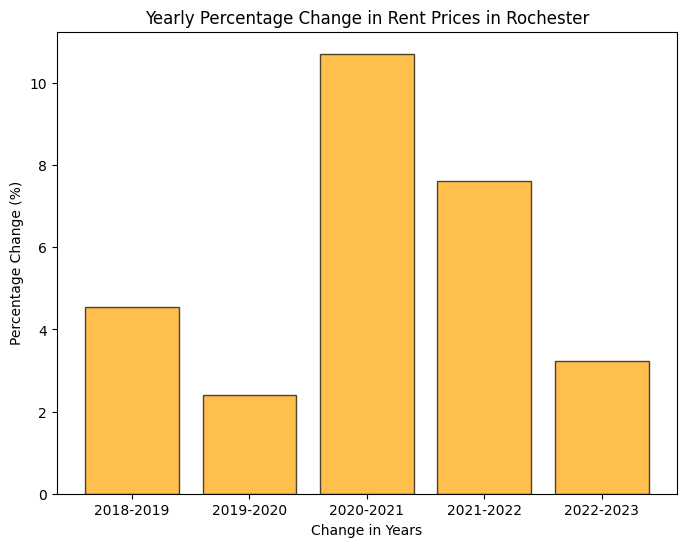

In [52]:
#Rochester Rent Price
percent_change = []
end_values = [1386, 1449, 1484, 1643, 1768, 1825]
years = len(end_values)
previous_end_value = end_values[0]
for year in range(1, years):
    current_end_value = end_values[year]
    yearly_change = current_end_value - previous_end_value
    percentage_change = (yearly_change / previous_end_value) * 100
    print(f"Change from {year + 2017} to {year + 2018}: ${yearly_change:.2f} ({percentage_change:.2f}%)")
    previous_end_value = current_end_value
    percent_change.append(percentage_change)
    
percent_change_2018_to_2019 = ((end_values[1] - end_values[0]) / end_values[0]) * 100
percent_change_2019_to_2020 = ((end_values[2] - end_values[1]) / end_values[1]) * 100
percent_change_2020_to_2021 = ((end_values[3] - end_values[2]) / end_values[2]) * 100
percent_change_2021_to_2022 = ((end_values[4] - end_values[3]) / end_values[3]) * 100
percent_change_2022_to_2023 = ((end_values[5] - end_values[4]) / end_values[4]) * 100

change_in_years = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']

plt.figure(figsize=(8, 6))
plt.bar(change_in_years, percent_change, color='orange',edgecolor='black', alpha=0.7)
plt.title('Yearly Percentage Change in Rent Prices in Rochester')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Change in Years')
plt.show()

Change from 2018 to 2019: $12212.00 (4.25%)
Change from 2019 to 2020: $24226.00 (8.09%)
Change from 2020 to 2021: $35886.00 (11.09%)
Change from 2021 to 2022: $15934.00 (4.43%)
Change from 2022 to 2023: $4042.00 (1.08%)


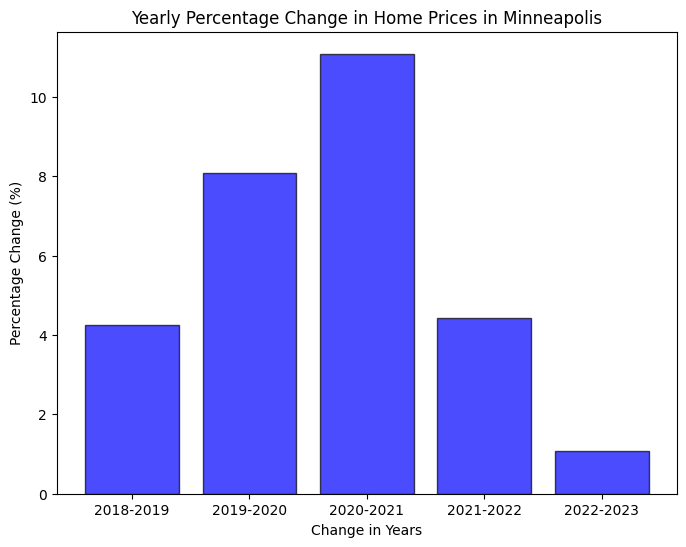

In [16]:
#Minneapolis Home Price
percent_change = []
end_values = [287245, 299457, 323683, 359569, 375503, 379545]
years = len(end_values)
previous_end_value = end_values[0]
for year in range(1, years):
    current_end_value = end_values[year]
    yearly_change = current_end_value - previous_end_value
    percentage_change = (yearly_change / previous_end_value) * 100
    print(f"Change from {year + 2017} to {year + 2018}: ${yearly_change:.2f} ({percentage_change:.2f}%)")
    previous_end_value = current_end_value
    percent_change.append(percentage_change)
    
percent_change_2018_to_2019 = ((end_values[1] - end_values[0]) / end_values[0]) * 100
percent_change_2019_to_2020 = ((end_values[2] - end_values[1]) / end_values[1]) * 100
percent_change_2020_to_2021 = ((end_values[3] - end_values[2]) / end_values[2]) * 100
percent_change_2021_to_2022 = ((end_values[4] - end_values[3]) / end_values[3]) * 100
percent_change_2022_to_2023 = ((end_values[5] - end_values[4]) / end_values[4]) * 100

change_in_years = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
plt.figure(figsize=(8, 6))
plt.bar(change_in_years, percent_change, color='blue', edgecolor='black', alpha=0.7)
plt.title('Yearly Percentage Change in Home Prices in Minneapolis')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Change in Years')
plt.show()

Change from 2018 to 2019: $10481.00 (6.62%)
Change from 2019 to 2020: $16965.00 (10.05%)
Change from 2020 to 2021: $23153.00 (12.47%)
Change from 2021 to 2022: $13819.00 (6.62%)
Change from 2022 to 2023: $11553.00 (5.19%)


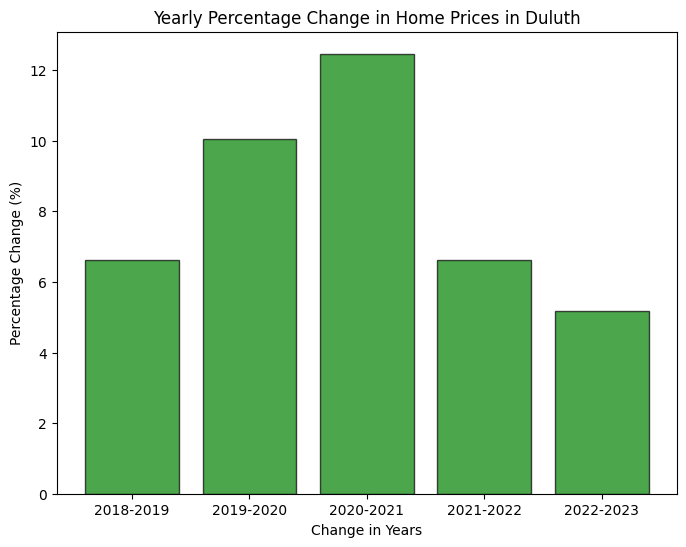

In [17]:
#Duluth Home Price
percent_change = []
end_values = [158294, 168775, 185740, 208893, 222712, 234265]
years = len(end_values)
previous_end_value = end_values[0]
for year in range(1, years):
    current_end_value = end_values[year]
    yearly_change = current_end_value - previous_end_value
    percentage_change = (yearly_change / previous_end_value) * 100
    print(f"Change from {year + 2017} to {year + 2018}: ${yearly_change:.2f} ({percentage_change:.2f}%)")
    previous_end_value = current_end_value
    percent_change.append(percentage_change)
    
percent_change_2018_to_2019 = ((end_values[1] - end_values[0]) / end_values[0]) * 100
percent_change_2019_to_2020 = ((end_values[2] - end_values[1]) / end_values[1]) * 100
percent_change_2020_to_2021 = ((end_values[3] - end_values[2]) / end_values[2]) * 100
percent_change_2021_to_2022 = ((end_values[4] - end_values[3]) / end_values[3]) * 100
percent_change_2022_to_2023 = ((end_values[5] - end_values[4]) / end_values[4]) * 100

change_in_years = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
plt.figure(figsize=(8, 6))
plt.bar(change_in_years, percent_change, color='green', edgecolor='black', alpha=0.7)
plt.title('Yearly Percentage Change in Home Prices in Duluth')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Change in Years')
plt.show()

Change from 2018 to 2019: $10748.00 (4.69%)
Change from 2019 to 2020: $20265.00 (8.45%)
Change from 2020 to 2021: $29124.00 (11.20%)
Change from 2021 to 2022: $19098.00 (6.60%)
Change from 2022 to 2023: $7405.00 (2.40%)


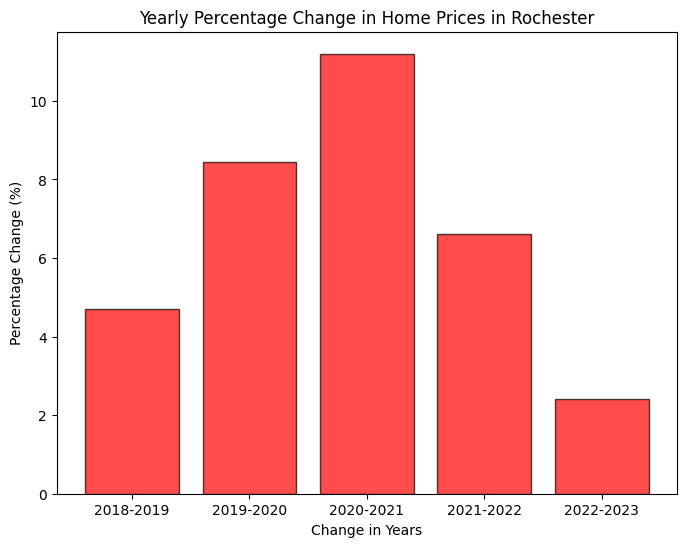

In [18]:
#Rochester Home Price
percent_change = []
end_values = [229023, 239771, 260036, 289160, 308258, 315663]
years = len(end_values)
previous_end_value = end_values[0]
for year in range(1, years):
    current_end_value = end_values[year]
    yearly_change = current_end_value - previous_end_value
    percentage_change = (yearly_change / previous_end_value) * 100
    print(f"Change from {year + 2017} to {year + 2018}: ${yearly_change:.2f} ({percentage_change:.2f}%)")
    previous_end_value = current_end_value
    percent_change.append(percentage_change)
    
percent_change_2018_to_2019 = ((end_values[1] - end_values[0]) / end_values[0]) * 100
percent_change_2019_to_2020 = ((end_values[2] - end_values[1]) / end_values[1]) * 100
percent_change_2020_to_2021 = ((end_values[3] - end_values[2]) / end_values[2]) * 100
percent_change_2021_to_2022 = ((end_values[4] - end_values[3]) / end_values[3]) * 100
percent_change_2022_to_2023 = ((end_values[5] - end_values[4]) / end_values[4]) * 100

change_in_years = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']

plt.figure(figsize=(8, 6))
plt.bar(change_in_years, percent_change, color='red', edgecolor='black', alpha=0.7)
plt.title('Yearly Percentage Change in Home Prices in Rochester')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Change in Years')
plt.show()

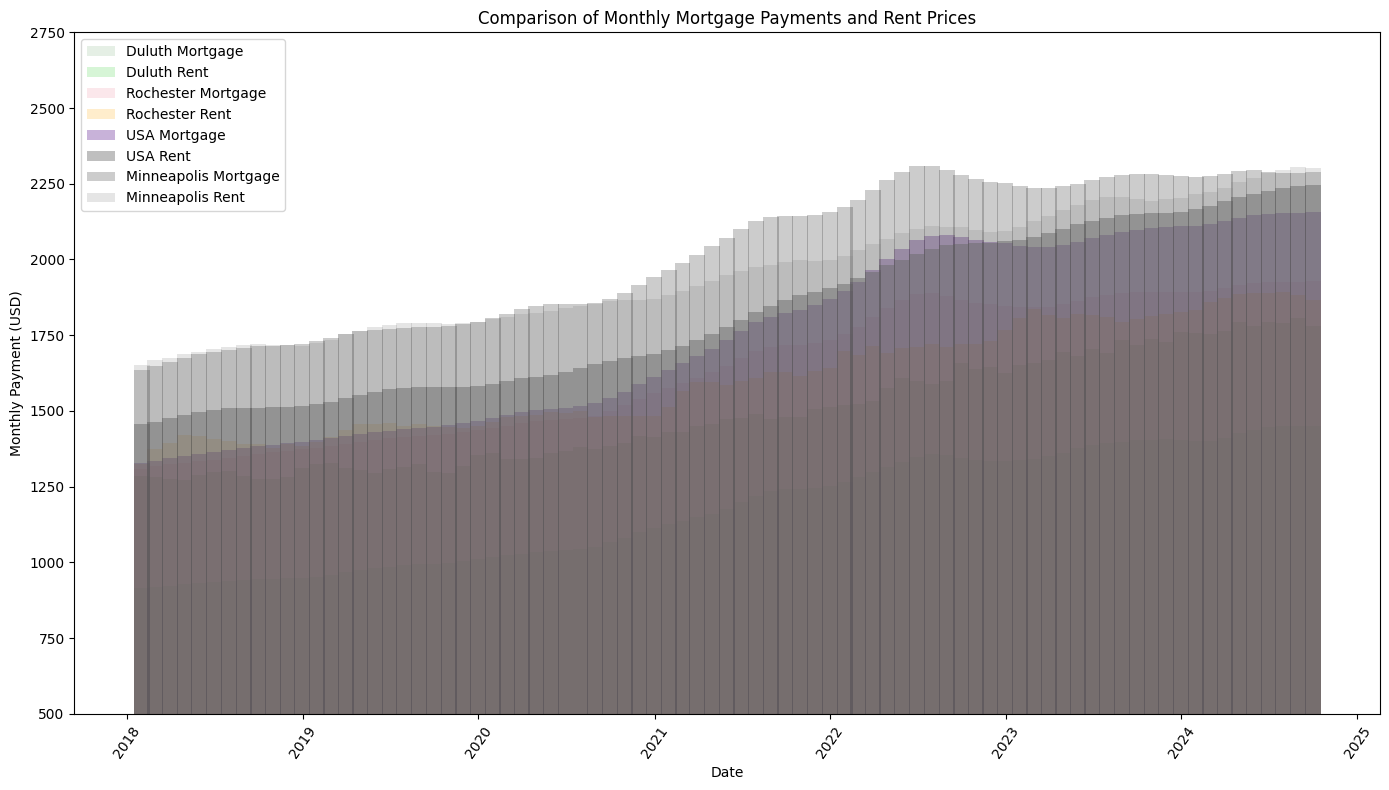

In [19]:
# Messing around with alpha numbers is tough to make it any better. I think there are too many variables. 
# Seems pretty inconclusive. Does show a trend. 

plt.figure(figsize=(14, 8))

# Increase the width of the bars accordingly
bar_width = 33

# Plot vertical bars for each city's mortgage and rent with alpha transparency
plt.bar(merged_df["MonthYear"], merged_df["Duluth_Mortgage"], label="Duluth Mortgage", color="darkgreen", width=bar_width, alpha=0.1)
plt.bar(merged_df["MonthYear"], merged_df["Duluth, MN_rent"], label="Duluth Rent", color="limegreen", width=bar_width, alpha=0.2)

plt.bar(merged_df["MonthYear"], merged_df["Rochester_Mortgage"], label="Rochester Mortgage", color="crimson", width=bar_width, alpha=0.1)
plt.bar(merged_df["MonthYear"], merged_df["Rochester, MN_rent"], label="Rochester Rent", color="orange", width=bar_width, alpha=0.2)

plt.bar(merged_df["MonthYear"], merged_df["USA_Mortgage"], label="USA Mortgage", color="indigo", width=bar_width, alpha=0.3)
plt.bar(merged_df["MonthYear"], merged_df["USA_rent"], label="USA Rent", color="grey", width=bar_width, alpha=0.5)

plt.bar(merged_df["MonthYear"], merged_df["Minneapolis_Mortgage"], label="Minneapolis Mortgage", color="black", width=bar_width, alpha=0.2)
plt.bar(merged_df["MonthYear"], merged_df["Minneapolis, MN_rent"], label="Minneapolis Rent", color="gray", width=bar_width, alpha=0.2)

plt.ylim(500, 2750)

plt.xlabel("Date")
plt.ylabel("Monthly Payment (USD)")
plt.title("Comparison of Monthly Mortgage Payments and Rent Prices")
plt.legend(loc="upper left")
plt.xticks(rotation=55)
plt.tight_layout()

plt.show()

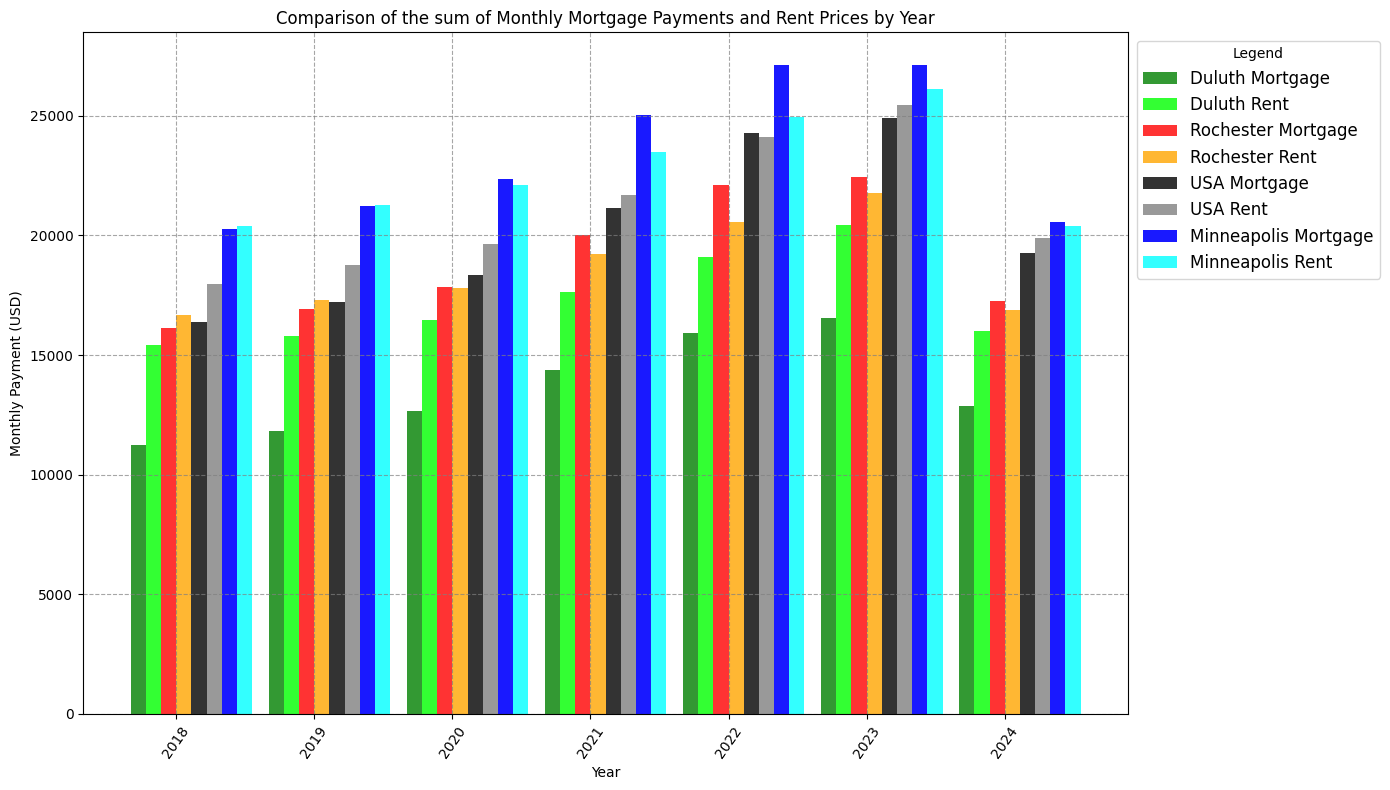

In [76]:
# Assuming 'MonthYear' is a datetime object. If not, convert it. Ran into an error prior
merged_df['MonthYear'] = pd.to_datetime(merged_df['MonthYear'])

# Resample data by year
merged_df['Year'] = merged_df['MonthYear'].dt.year

# Get the unique years for the x-axis
years = merged_df['Year'].unique()

# Set bar width and adjust for spacing
bar_width = 0.11  # Make bars narrower to fit more on the x-axis. This will impact the plt.bar portion alot as well. 
index = range(len(years))  # X positions for each year

# Create the plot
plt.figure(figsize=(14, 8))

# Plot bars for each city's mortgage and rent category for each year. This takes alot of time to try different values at first. 
plt.bar([i - 2.5*bar_width for i in index], merged_df.groupby('Year')["Duluth_Mortgage"].sum(), label="Duluth Mortgage", color="green", width=bar_width, alpha=0.8)
plt.bar([i - 1.5*bar_width for i in index], merged_df.groupby('Year')["Duluth, MN_rent"].sum(), label="Duluth Rent", color="lime", width=bar_width, alpha=0.8)

plt.bar([i - 0.5*bar_width for i in index], merged_df.groupby('Year')["Rochester_Mortgage"].sum(), label="Rochester Mortgage", color="red", width=bar_width, alpha=0.8)
plt.bar([i + 0.5*bar_width for i in index], merged_df.groupby('Year')["Rochester, MN_rent"].sum(), label="Rochester Rent", color="orange", width=bar_width, alpha=0.8)

plt.bar([i + 1.5*bar_width for i in index], merged_df.groupby('Year')["USA_Mortgage"].sum(), label="USA Mortgage", color="black", width=bar_width, alpha=0.8)
plt.bar([i + 2.5*bar_width for i in index], merged_df.groupby('Year')["USA_rent"].sum(), label="USA Rent", color="gray", width=bar_width, alpha=0.8)

plt.bar([i + 3.5*bar_width for i in index], merged_df.groupby('Year')["Minneapolis_Mortgage"].sum(), label="Minneapolis Mortgage", color="blue", width=bar_width, alpha=0.9)
plt.bar([i + 4.5*bar_width for i in index], merged_df.groupby('Year')["Minneapolis, MN_rent"].sum(), label="Minneapolis Rent", color="cyan", width=bar_width, alpha=0.8)

plt.xlabel("Year")
plt.ylabel("Monthly Payment (USD)")
plt.title("Comparison of the sum of Monthly Mortgage Payments and Rent Prices by Year")

plt.grid(True, linestyle='--', color='gray', alpha=0.7) 

# Add the legend with better placement and readable font size
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Legend", fontsize=12)

plt.xticks(index, years, rotation=55)

plt.tight_layout()
plt.show()


In [21]:
# 2024 Data was not a full year. The sum will almost certainly be lower. 

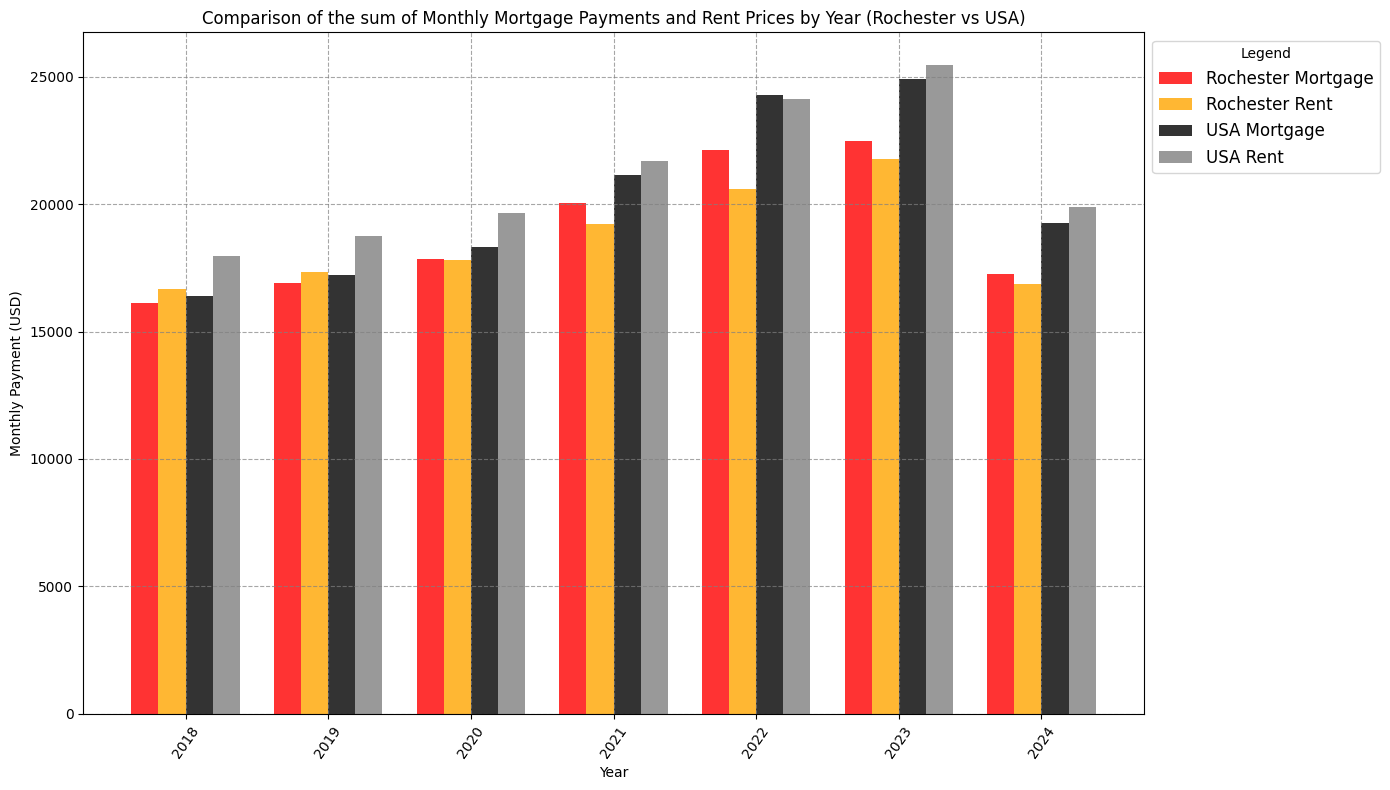

In [84]:
# Assuming 'MonthYear' is a datetime object. If not, convert it.
merged_df['MonthYear'] = pd.to_datetime(merged_df['MonthYear'])

# Resample data by year
merged_df['Year'] = merged_df['MonthYear'].dt.year

# Get the unique years for the x-axis
years = merged_df['Year'].unique()

# Set bar width and adjust for spacing
bar_width = 0.19  # Make bars narrower to fit more on the x-axis. This will impact the plt.bar portion alot as well. 
index = range(len(years))  # X positions for each year

# Create the plot
plt.figure(figsize=(14, 8))

# Plot bars for each city's mortgage and rent category for USA and Rochester only.
plt.bar([i - 1.5*bar_width for i in index], merged_df.groupby('Year')["Rochester_Mortgage"].sum(), label="Rochester Mortgage", color="red", width=bar_width, alpha=0.8)
plt.bar([i - 0.5*bar_width for i in index], merged_df.groupby('Year')["Rochester, MN_rent"].sum(), label="Rochester Rent", color="orange", width=bar_width, alpha=0.8)

plt.bar([i + 0.5*bar_width for i in index], merged_df.groupby('Year')["USA_Mortgage"].sum(), label="USA Mortgage", color="black", width=bar_width, alpha=0.8)
plt.bar([i + 1.5*bar_width for i in index], merged_df.groupby('Year')["USA_rent"].sum(), label="USA Rent", color="gray", width=bar_width, alpha=0.8)

plt.xlabel("Year")
plt.ylabel("Monthly Payment (USD)")
plt.title("Comparison of the sum of Monthly Mortgage Payments and Rent Prices by Year (Rochester vs USA)")

plt.grid(True, linestyle='--', color='gray', alpha=0.7) 

# Add the legend with better placement and readable font size
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Legend", fontsize=12)

plt.xticks(index, years, rotation=55)

plt.tight_layout()
plt.show()


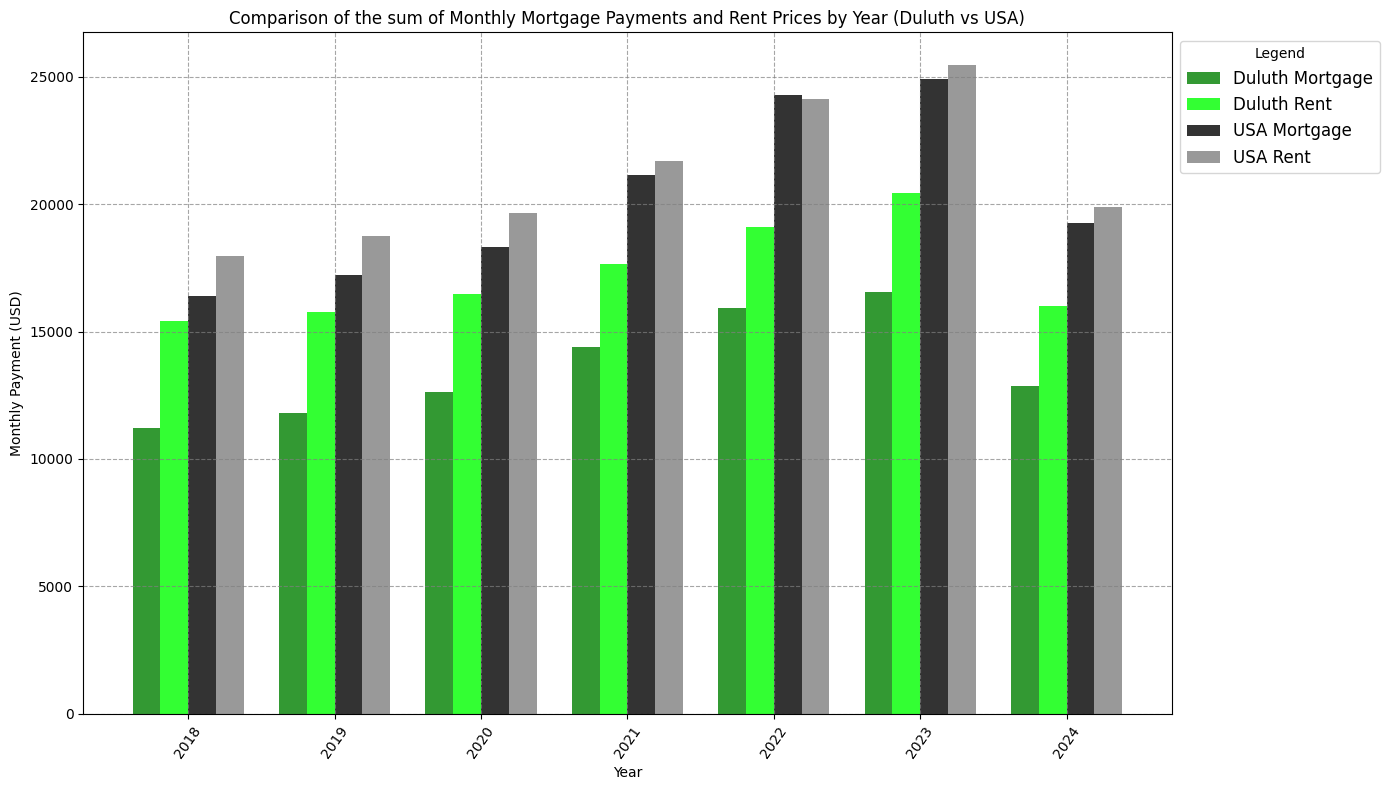

In [86]:
# Assuming 'MonthYear' is a datetime object. If not, convert it.
merged_df['MonthYear'] = pd.to_datetime(merged_df['MonthYear'])

# Resample data by year
merged_df['Year'] = merged_df['MonthYear'].dt.year

# Get the unique years for the x-axis
years = merged_df['Year'].unique()

# Set bar width and adjust for spacing
bar_width = 0.19  # Make bars narrower to fit more on the x-axis. This will impact the plt.bar portion alot as well. 
index = range(len(years))  # X positions for each year

# Create the plot
plt.figure(figsize=(14, 8))

# Plot bars for each city's mortgage and rent category for USA and Duluth only.
plt.bar([i - 1.5*bar_width for i in index], merged_df.groupby('Year')["Duluth_Mortgage"].sum(), label="Duluth Mortgage", color="green", width=bar_width, alpha=0.8)
plt.bar([i - 0.5*bar_width for i in index], merged_df.groupby('Year')["Duluth, MN_rent"].sum(), label="Duluth Rent", color="lime", width=bar_width, alpha=0.8)

plt.bar([i + 0.5*bar_width for i in index], merged_df.groupby('Year')["USA_Mortgage"].sum(), label="USA Mortgage", color="black", width=bar_width, alpha=0.8)
plt.bar([i + 1.5*bar_width for i in index], merged_df.groupby('Year')["USA_rent"].sum(), label="USA Rent", color="gray", width=bar_width, alpha=0.8)

plt.xlabel("Year")
plt.ylabel("Monthly Payment (USD)")
plt.title("Comparison of the sum of Monthly Mortgage Payments and Rent Prices by Year (Duluth vs USA)")

plt.grid(True, linestyle='--', color='gray', alpha=0.7) 

# Add the legend with better placement and readable font size
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Legend", fontsize=12)

plt.xticks(index, years, rotation=55)

plt.tight_layout()
plt.show()

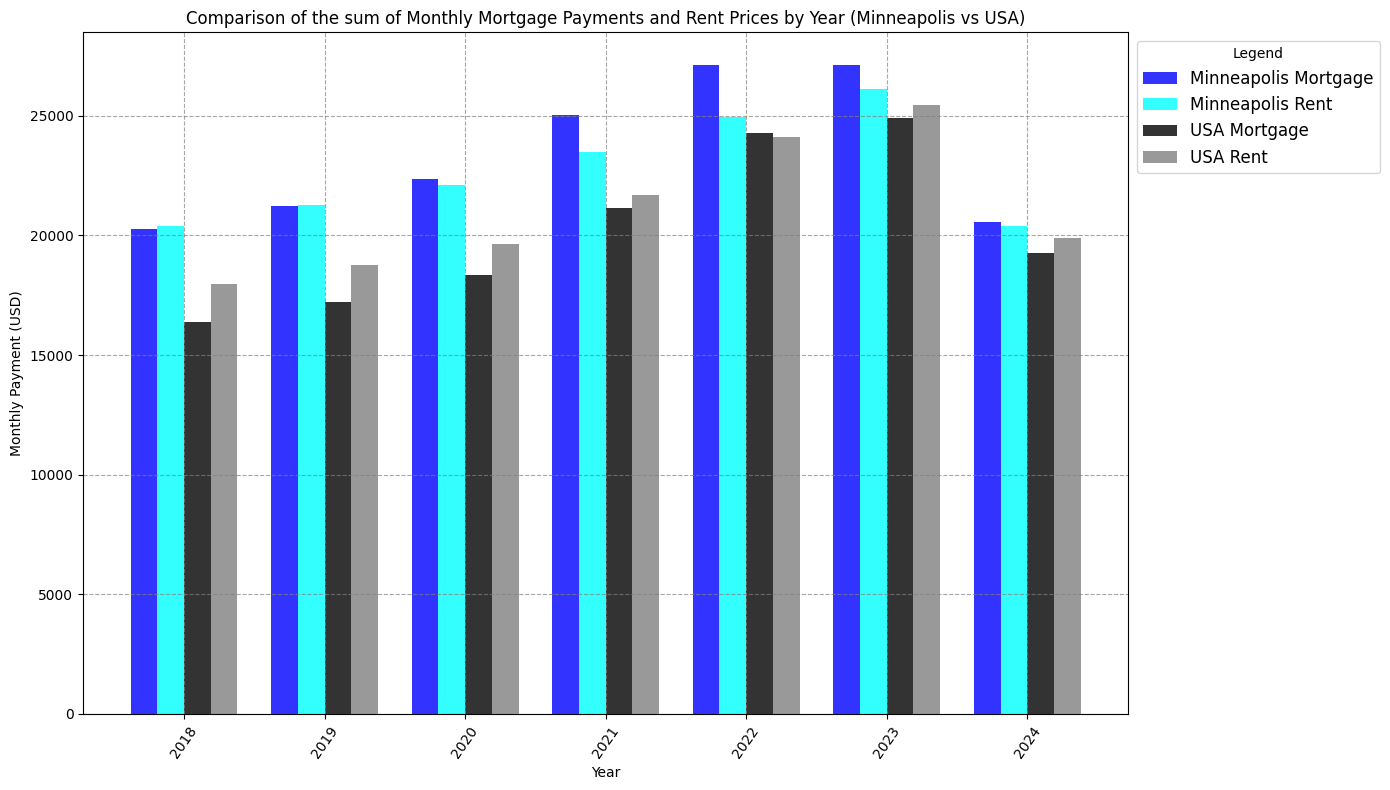

In [88]:
# Assuming 'MonthYear' is a datetime object. If not, convert it.
merged_df['MonthYear'] = pd.to_datetime(merged_df['MonthYear'])

# Resample data by year
merged_df['Year'] = merged_df['MonthYear'].dt.year

# Get the unique years for the x-axis
years = merged_df['Year'].unique()

# Set bar width and adjust for spacing
bar_width = 0.19  # Make bars narrower to fit more on the x-axis. This will impact the plt.bar portion alot as well. 
index = range(len(years))  # X positions for each year

# Create the plot
plt.figure(figsize=(14, 8))

# Plot Minneapolis data first (Mortgage first, then Rent)
plt.bar([i - 1.5*bar_width for i in index], merged_df.groupby('Year')["Minneapolis_Mortgage"].sum(), label="Minneapolis Mortgage", color="blue", width=bar_width, alpha=0.8)
plt.bar([i - 0.5*bar_width for i in index], merged_df.groupby('Year')["Minneapolis, MN_rent"].sum(), label="Minneapolis Rent", color="cyan", width=bar_width, alpha=0.8)

# Plot USA data second (Mortgage first, then Rent)
plt.bar([i + 0.5*bar_width for i in index], merged_df.groupby('Year')["USA_Mortgage"].sum(), label="USA Mortgage", color="black", width=bar_width, alpha=0.8)
plt.bar([i + 1.5*bar_width for i in index], merged_df.groupby('Year')["USA_rent"].sum(), label="USA Rent", color="gray", width=bar_width, alpha=0.8)

plt.xlabel("Year")
plt.ylabel("Monthly Payment (USD)")
plt.title("Comparison of the sum of Monthly Mortgage Payments and Rent Prices by Year (Minneapolis vs USA)")

plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Add the legend with the correct order (as per your request)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Legend", fontsize=12)

plt.xticks(index, years, rotation=55)

plt.tight_layout()
plt.show()